# Setting up the notebook

## Import the packages we need

There are several libraries that have been created that we can use to make our job easier. We can import these libraries, so that we can take advantage of the functionalities they have, without developing the code ourselves.

Importing these packages needs to be done at the **top** of the notebook, before we run any code.

- [`pandas`](https://pandas.pydata.org/) "is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool"

- [`sklearn`](https://scikit-learn.org/) is a library of tools for predictive and descriptive data analysis written in Python

- [`matplotlib`](https://matplotlib.org/) is a library for creating visualizations

- [`seaborn`](https://seaborn.pydata.org/) is a library for creating visualizations, built on top of `matplotlib`

In [1]:
from math import ceil

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [2]:
sns.set()


# Import the Data

In [3]:
## To Load our CSV file into a dataframe
## First we need to provide access to our file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## Load csv file into a dataframe 

data_path = "/content/drive/MyDrive/FAI2223_Notebooks/data/spaceship_titanic_dataset.csv"
df = pd.read_csv(data_path)

## Check file loaded
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Exploring and Understanding the Data

## Dataset description

Our dataset was taken from a Kaggle competition called Spaceship Titanic (Howard et al., 2022)<a name="cite1"></a>[<sup>[1]</sup>](#note1)

Given the details of the passengers on board a spaceship:

1. create a predictive model for which passengers were transported to an alternate dimension. 
2. create a descriptive model about the passengers. 

- **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

- **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- **Destination** - The planet the passenger will be debarking to.

- **Age** - The age of the passenger.

- **VIP** - Whether the passenger has paid for special VIP service during the voyage.

- **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- **Name** - The first and last names of the passenger.

- **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

---
<a name="cite-1"></a>1. [^](#cite1) Howard, A., Chow, A., & Holbrook, R. (2022). Spaceship titanic. https://kaggle.com/competitions/spaceship-titanic

## What are the different columns in our data?

In [5]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

### Let's divide them into two groups

We can use the `.describe()` function on our dataframe to get some initial statistics about our data.

In [6]:
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [7]:
metric_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
non_metric_features = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]
target_variable = "Transported"

## What are some characteristics of our data?

In [8]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
print("""The .describe() function gives us statistics about {} columns. We have {} columns in our dataset.""".format(len(df.describe().columns), len(df.columns)))

The .describe() function gives us statistics about 6 columns. We have 14 columns in our dataset.


We can use the `.info()` function to get some information about the data we have.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
## Modify the .describe() function
df.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [12]:
## Count of missing values
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Let's answer some questions

### What is the mean value for "Age" for the passengers?

In [13]:
df["Age"].mean()

28.82793046746535

#### What about only those with Transported = True? Transported = False?


In [14]:
df.groupby("Transported")["Age"].mean()

Transported
False    29.922858
True     27.748834
Name: Age, dtype: float64

### How many passengers were transported?

In [15]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

### How many passengers with VIP=True have Transported=True?

In [16]:
df.groupby(["VIP","Transported"])["Transported"].count()


VIP    Transported
False  False          4093
       True           4198
True   False           123
       True             76
Name: Transported, dtype: int64

### What are the different values for "HomePlanet"?

In [17]:
df["HomePlanet"].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

### How many different values are there for "Cabin"?

In [18]:
df["Cabin"].nunique()

6560

### Exercise: Answer the following questions.

1. What is the average spend for "RoomService"?
  
  - What is the average spend for this variable when Transported=True? 
  - What about Transported=False?

1. What are the different Destination values?

1. Challenge: 
  - What is the age of the oldest person from the "HomePlanet" of "Mars"?
  - On average, which HomePlanet has the oldest passengers with Transported=True?


[Link to **optional** quiz](https://forms.gle/z5JTDexeUzUX1mQK8)



<!--
## ------------- ANSWERS -------------


df["RoomService"].mean()
df.groupby("Transported")["RoomService"].mean()
df["Destination"].unique()
df.groupby("HomePlanet")["Age"].max()
df.groupby(["Transported","HomePlanet"])["Age"].mean()
-->

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


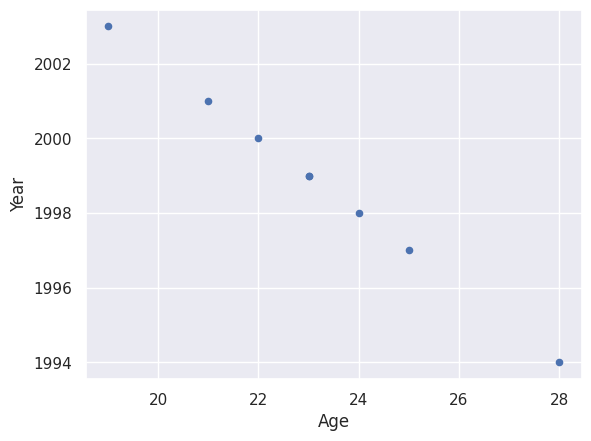

In [19]:
testx = pd.Series([23,24,21,25,22,23,19,28])
testy = 2022 - testx
test_df = pd.DataFrame({"Age":testx, "Year":testy})

test_df.plot.scatter(x="Age", y="Year")
plt.show()

## Numeric Data 

### Univariate Analysis of Data

In [20]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

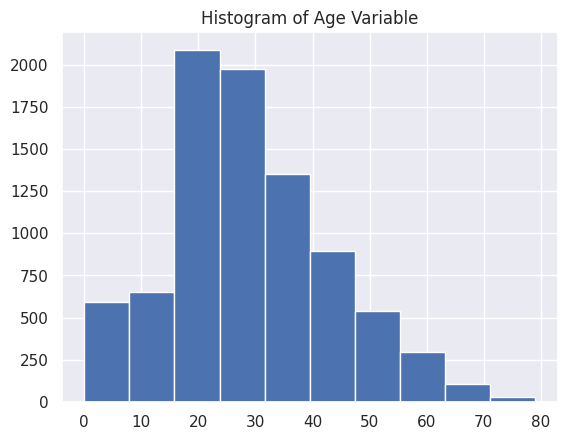

In [21]:
# Single Metric Variable Histogram
plt.hist(df["Age"], bins=10)  # mess around with the bins
plt.title("Histogram of Age Variable")

plt.show()

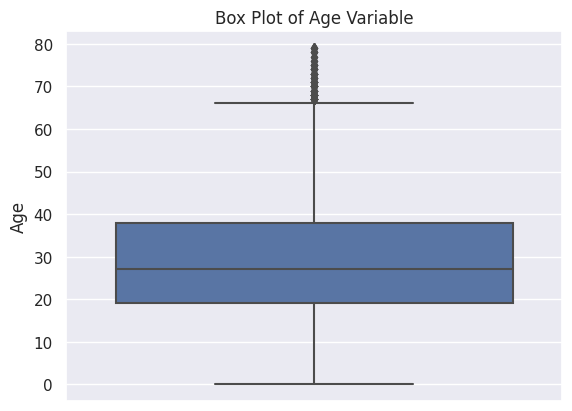

In [22]:
# Single Metric Variable Box Plot
sns.boxplot(y=df["Age"])
plt.title("Box Plot of Age Variable")

plt.show()

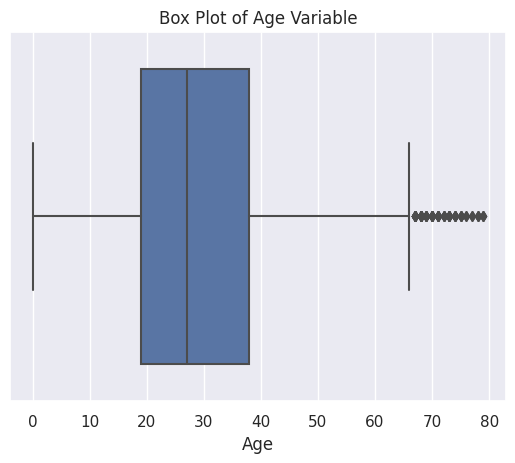

In [23]:
# Single Metric Variable Box Plot
sns.boxplot(x=df["Age"], orient="Horizontal")
plt.title("Box Plot of Age Variable")

plt.show()

In [24]:
## Define a function that plots multiple histograms

def plot_multiple_histograms(data, feats, title="Numeric Variables' Histograms"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      ax.hist(data[feat])
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return


## Define a function that plots multiple box plots

def plot_multiple_boxplots(data, feats, title="Numeric Variables' Box Plots"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      sns.boxplot(x=data[feat], ax=ax)
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)

    plt.show()

    return




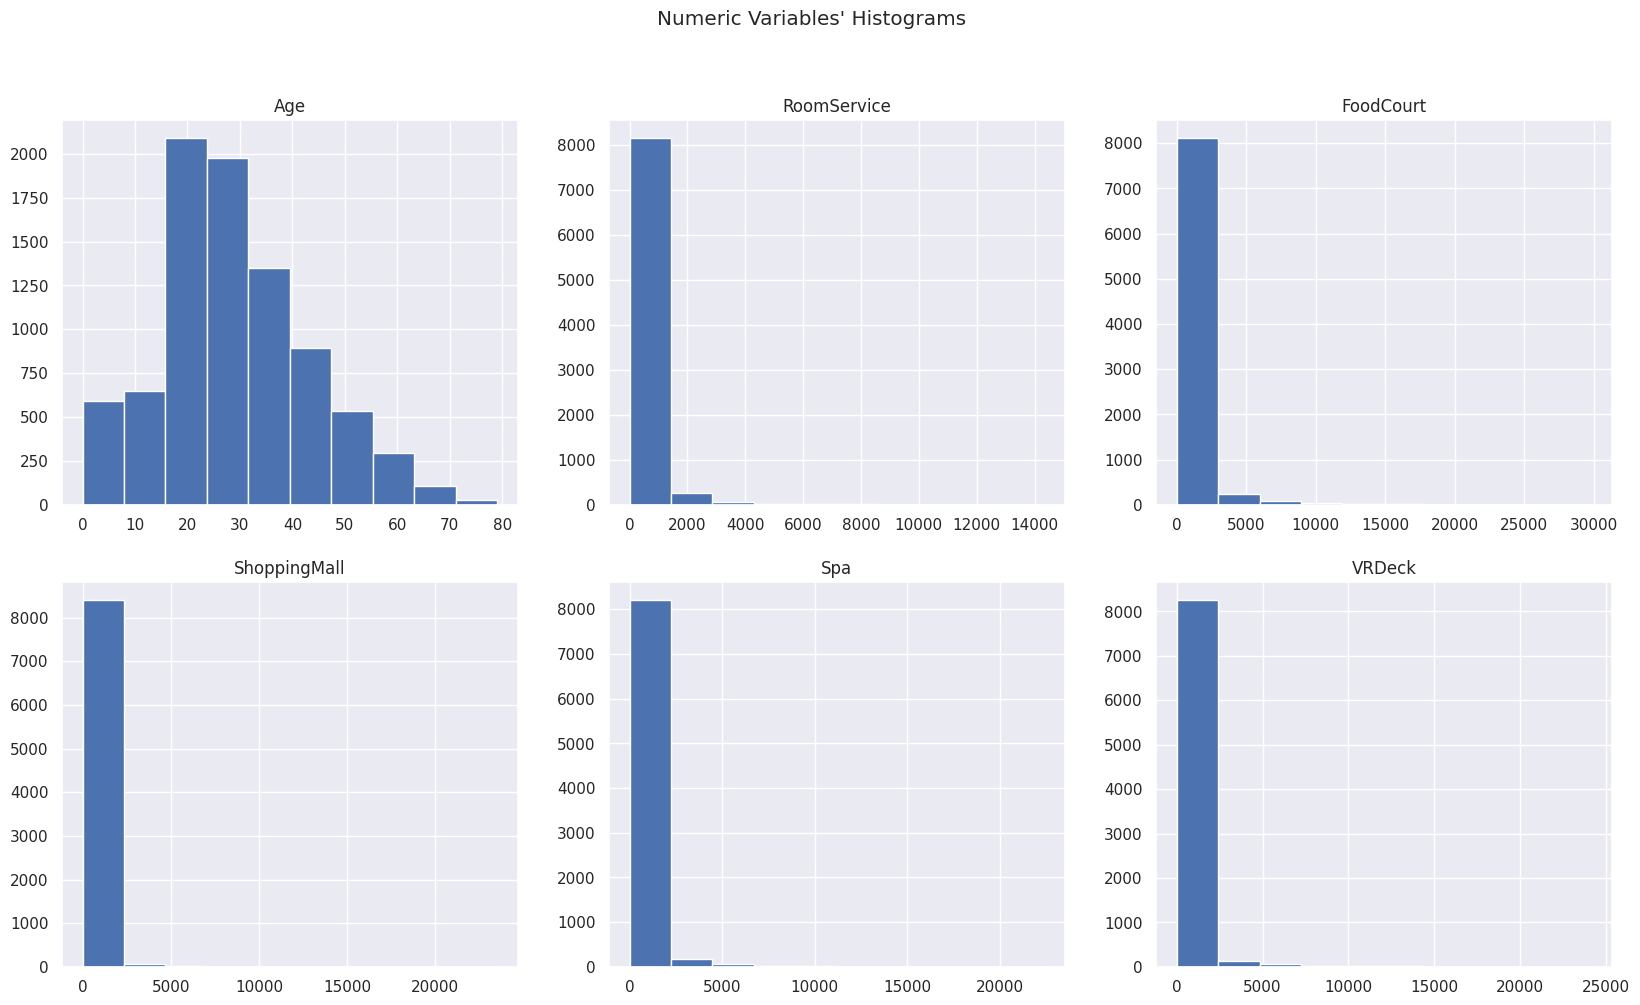

In [25]:
# All Numeric Variables' Histograms in one figure
sns.set()

plot_multiple_histograms(df, metric_features)



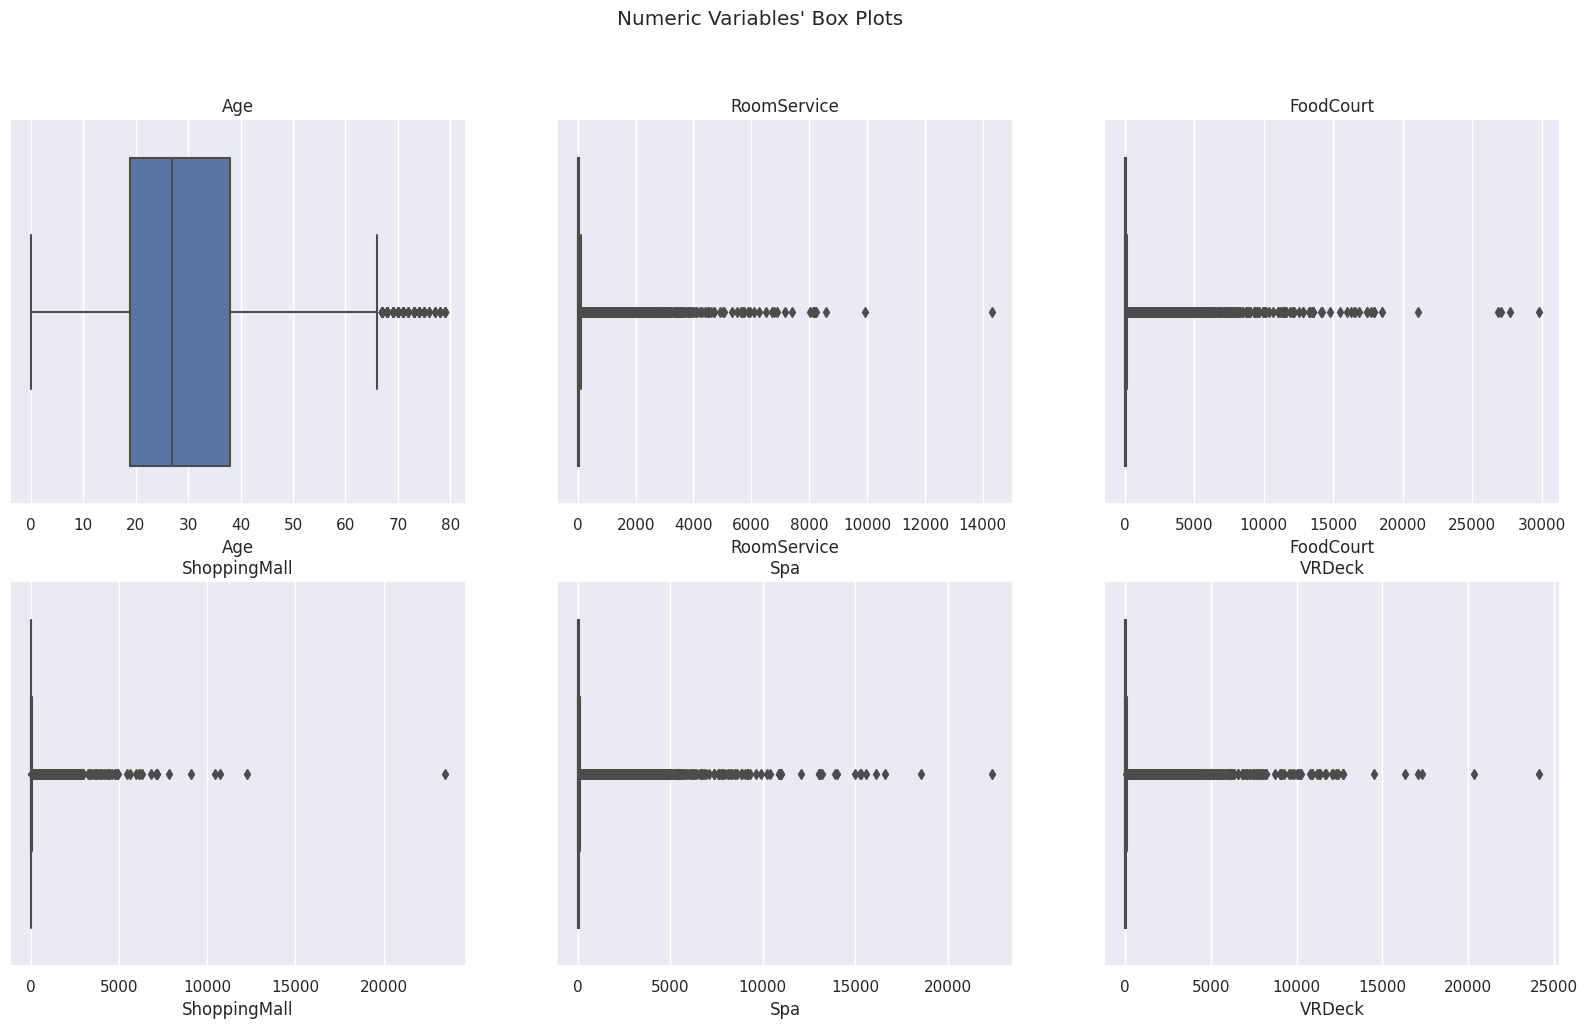

In [26]:
# All Numeric Variables' Boxplots in one figure
sns.set()

plot_multiple_boxplots(df, metric_features)


### Multivariate Analysis of Data

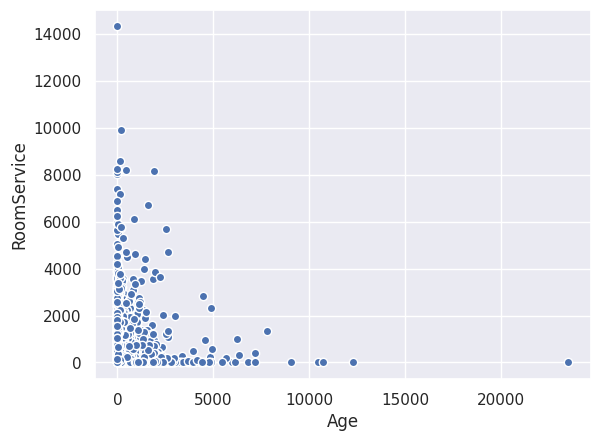

In [27]:
# Single Pair Metric Variable Scatter plot
plt.scatter(df["ShoppingMall"], df["RoomService"], edgecolors="white")
plt.xlabel("Age")
plt.ylabel("RoomService")

plt.show()

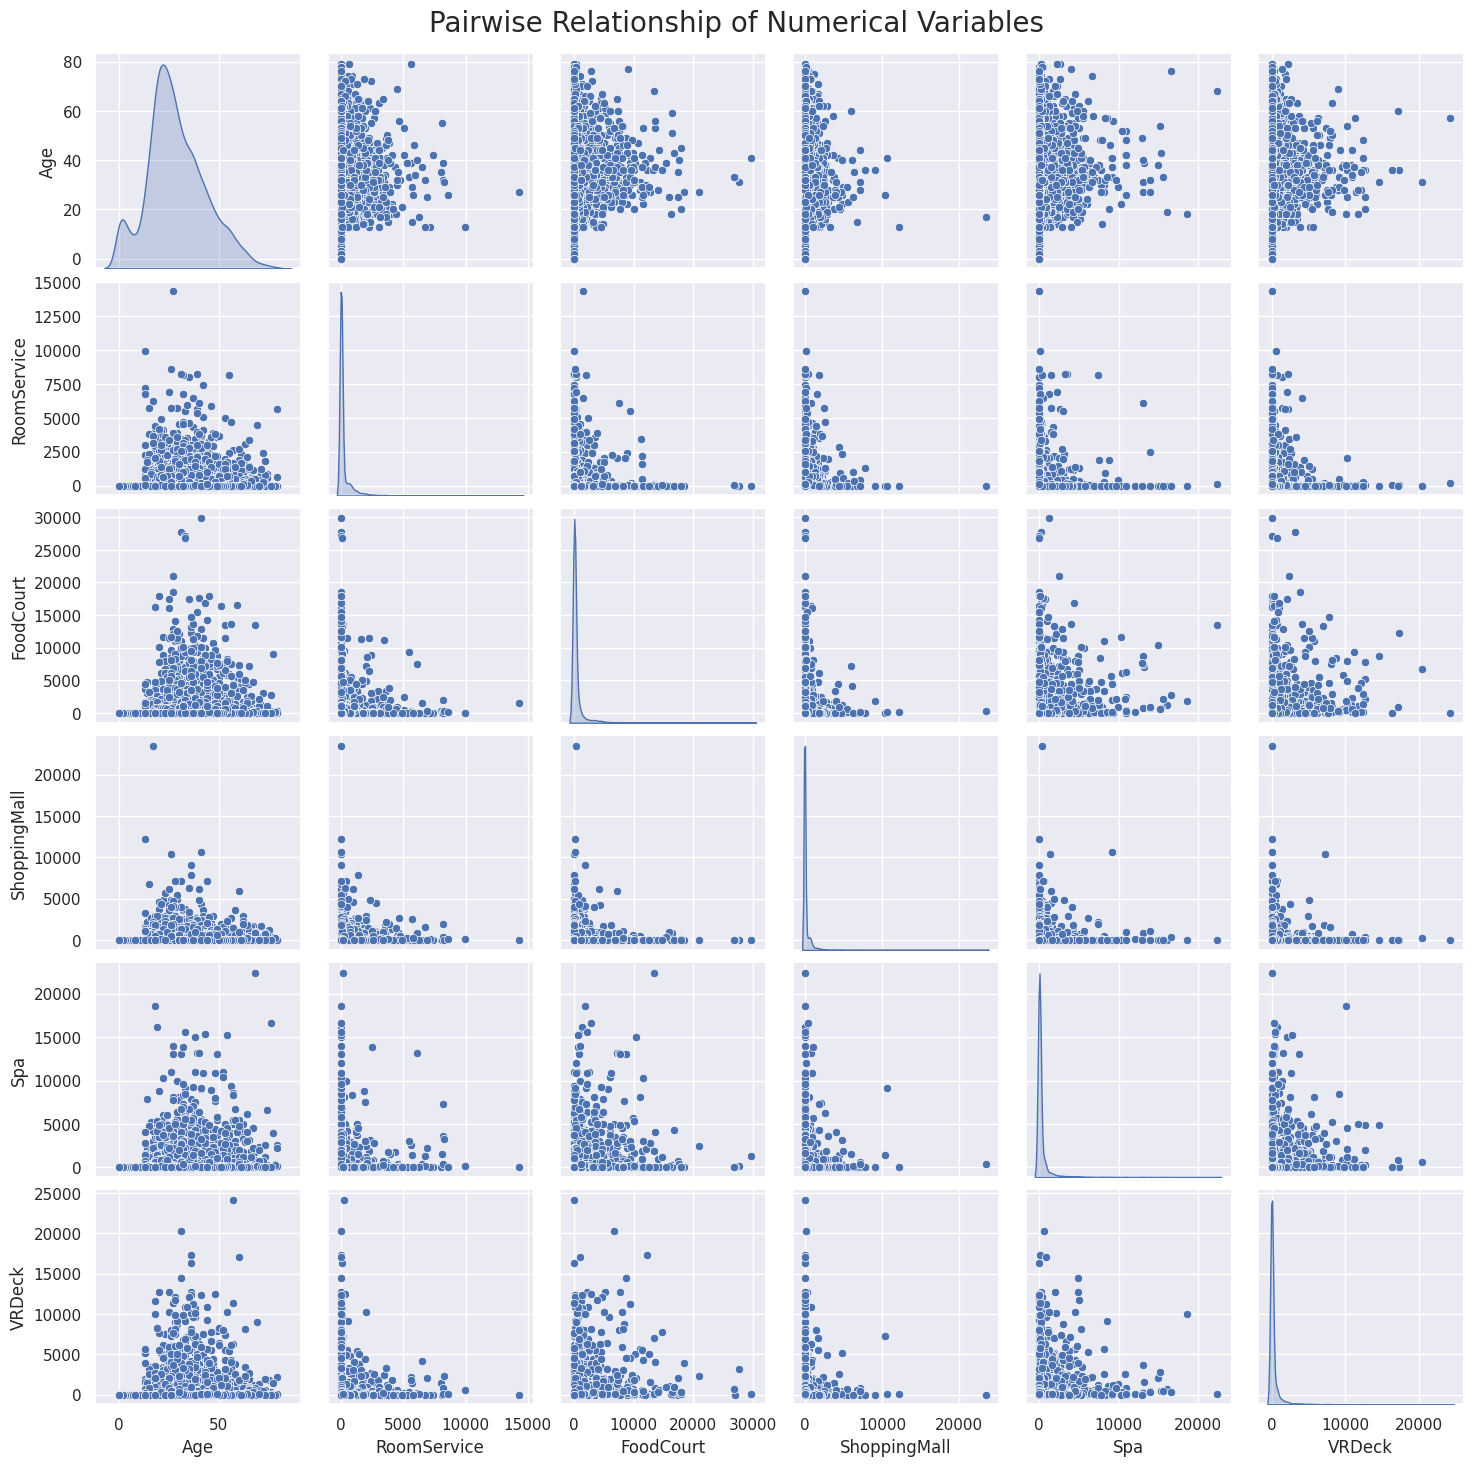

In [28]:
# Pairwise Relationship of All Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="kde")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

### Correlation Matrix

In [29]:
def plot_corrmatrix(df, feats, method="pearson"):
  # Prepare figure
  fig = plt.figure(figsize=(10, 8))

  # Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
  corr = np.round(df[feats].corr(method=method), decimals=2)

  # Plot heatmap of the correlation matrix
  sns.heatmap(data=corr, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
              vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

  # Layout
  fig.subplots_adjust(top=0.95)
  fig.suptitle("Correlation Matrix", fontsize=20)

  plt.show()
  return 


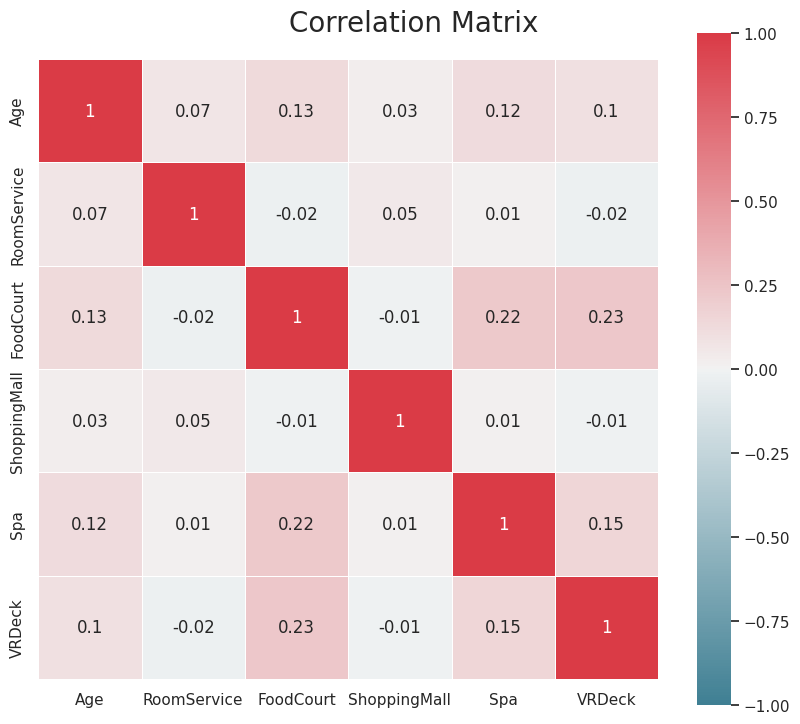

In [30]:
plot_corrmatrix(df, metric_features, "pearson")

#### Example using different dataset

In [31]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [32]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

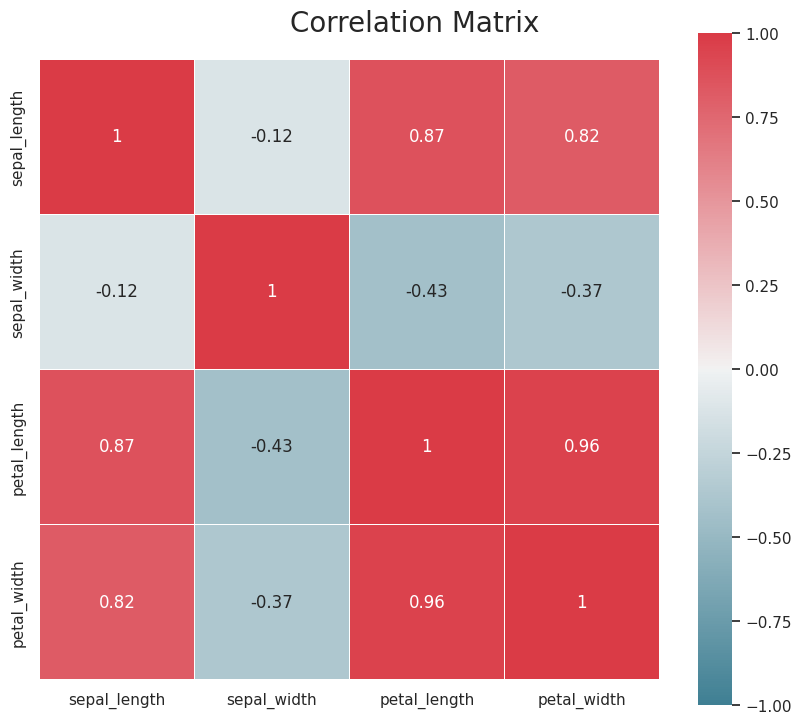

In [33]:
iris_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plot_corrmatrix(iris, 
                iris_cols, 
                "pearson")


## Categorical Data

In [34]:
non_metric_features

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

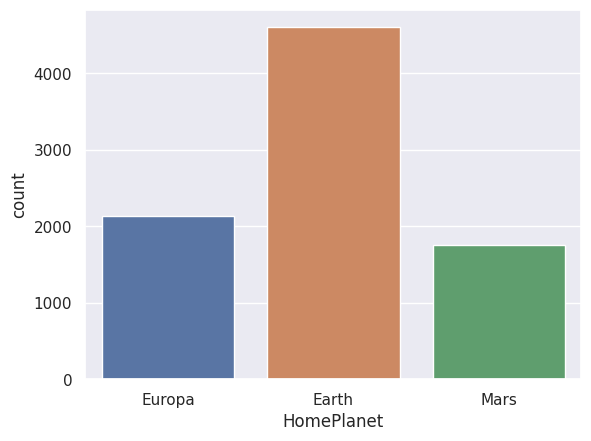

In [35]:
# Single Non-Metric variable bar plot
sns.set()
sns.countplot(x=df["HomePlanet"])
plt.show()

In [36]:
## Define a function that plots multiple countplots

def plot_categorical_frequencies(data, feats, 
                             title="Categorical Variables' Counts"):
  
    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(2, ceil(len(feats) / 2), figsize=(20, 11))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
        sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc')

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)


    plt.show()

    return



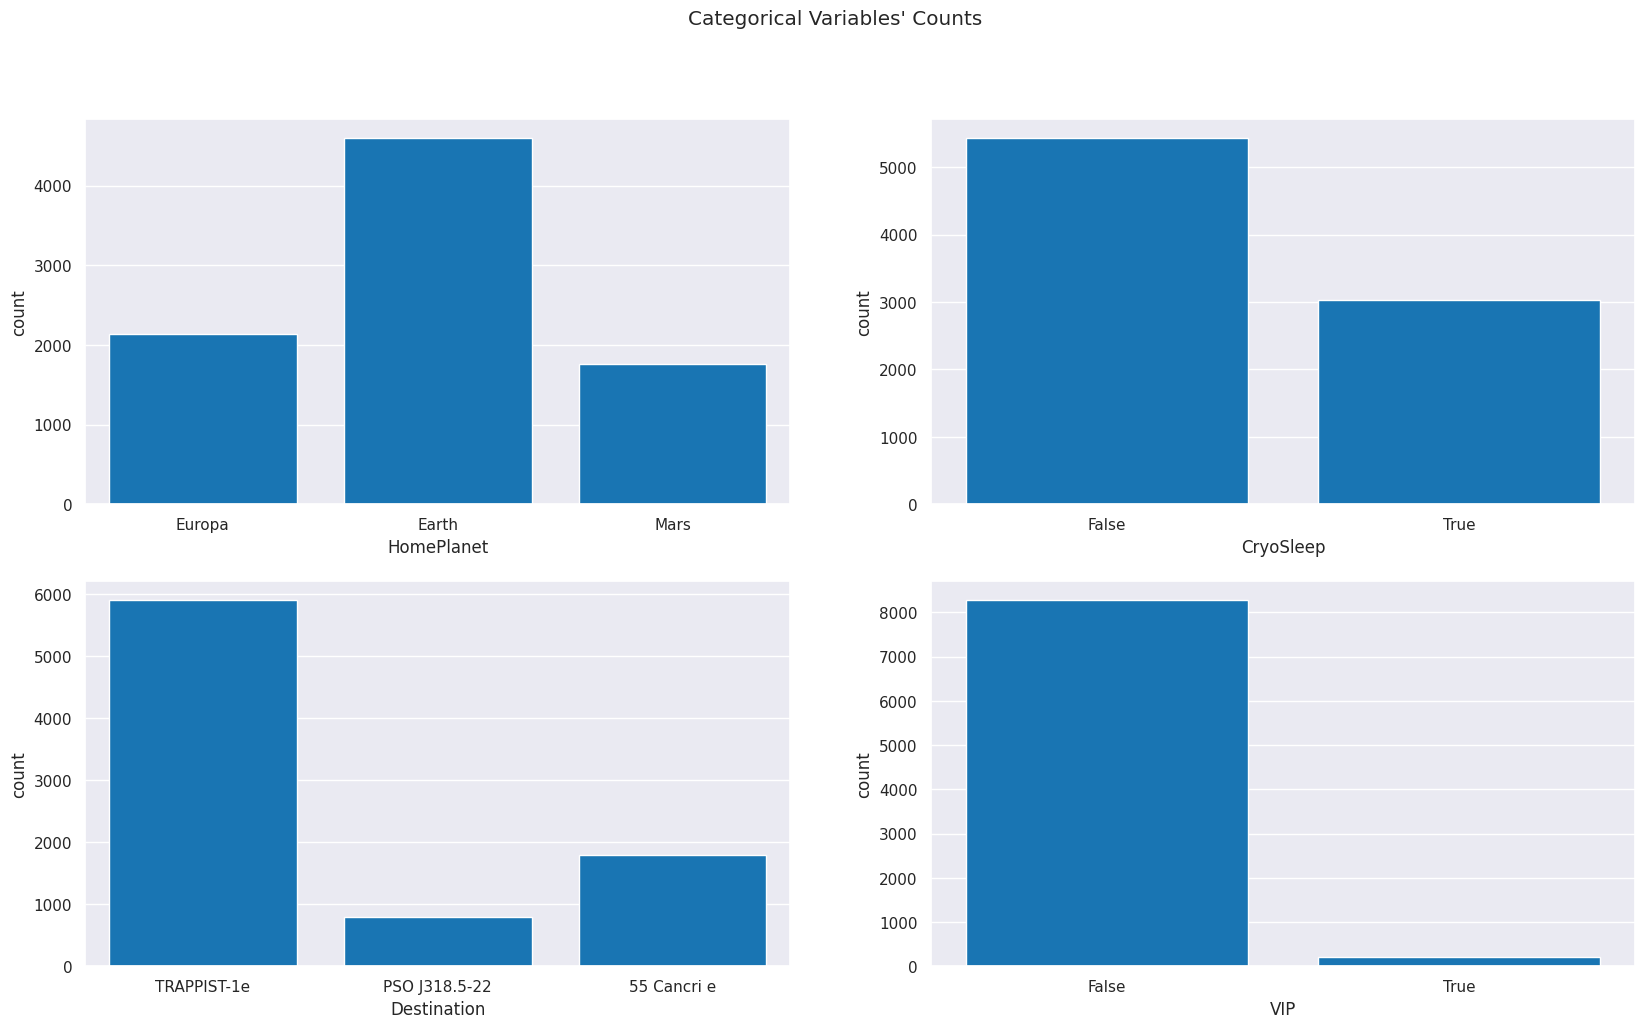

In [37]:
plot_categorical_frequencies(df, ['HomePlanet', 'CryoSleep', 'Destination', 'VIP'])


### Pair of categorical features

In [38]:
def plot_cat_pair(df, cat1, cat2):
  fig, ax = plt.subplots(1,2, figsize=(10,5))
  df_counts = df.groupby([cat1, cat2])\
      .size()\
      .unstack()
  df_counts.plot.bar(stacked=True, ax=ax[0], title="Absolute Frequency".format(cat1, cat2))

  catpc_df = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()
  catpc_df.unstack().plot.bar(stacked=True, ax=ax[1], title="Relative Frequency")

  fig.suptitle("{} and {}".format(cat1, cat2))
  plt.show()
  return


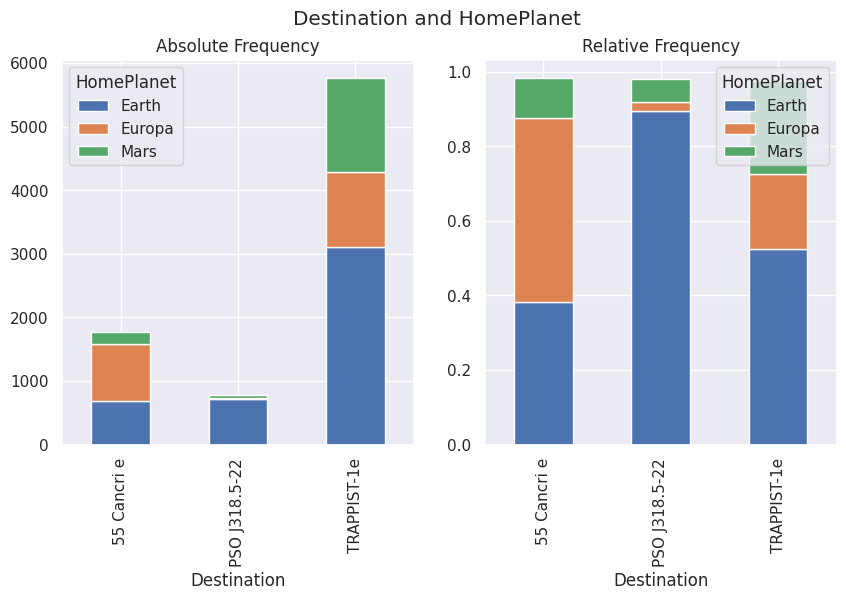

In [39]:
## Call the function
sns.set()

plot_cat_pair(df, 'Destination', 'HomePlanet')


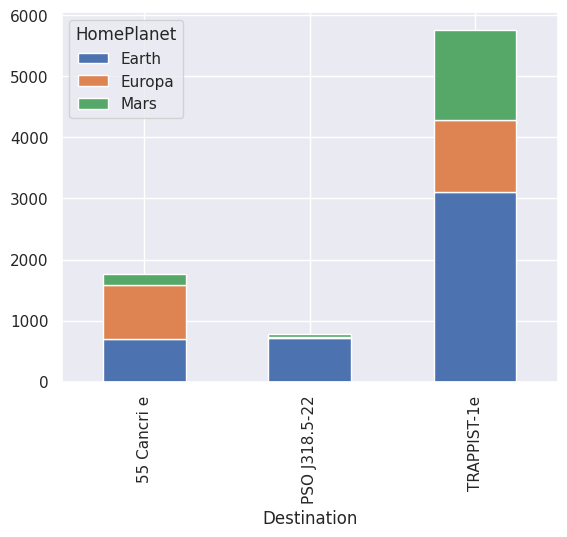

In [40]:
sns.set()
df_counts = df\
    .groupby(['Destination', 'HomePlanet'])\
    .size()\
    .unstack()\
    .plot.bar(stacked=True)


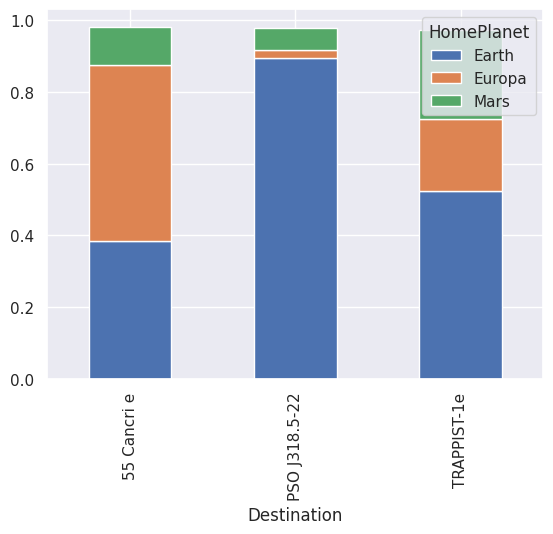

In [41]:
cat1 = 'Destination'
cat2 = 'HomePlanet'

catpc_df = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size()

catpc_df.unstack().plot.bar(stacked=True)


plt.show()

## Categorical and Numeric Data

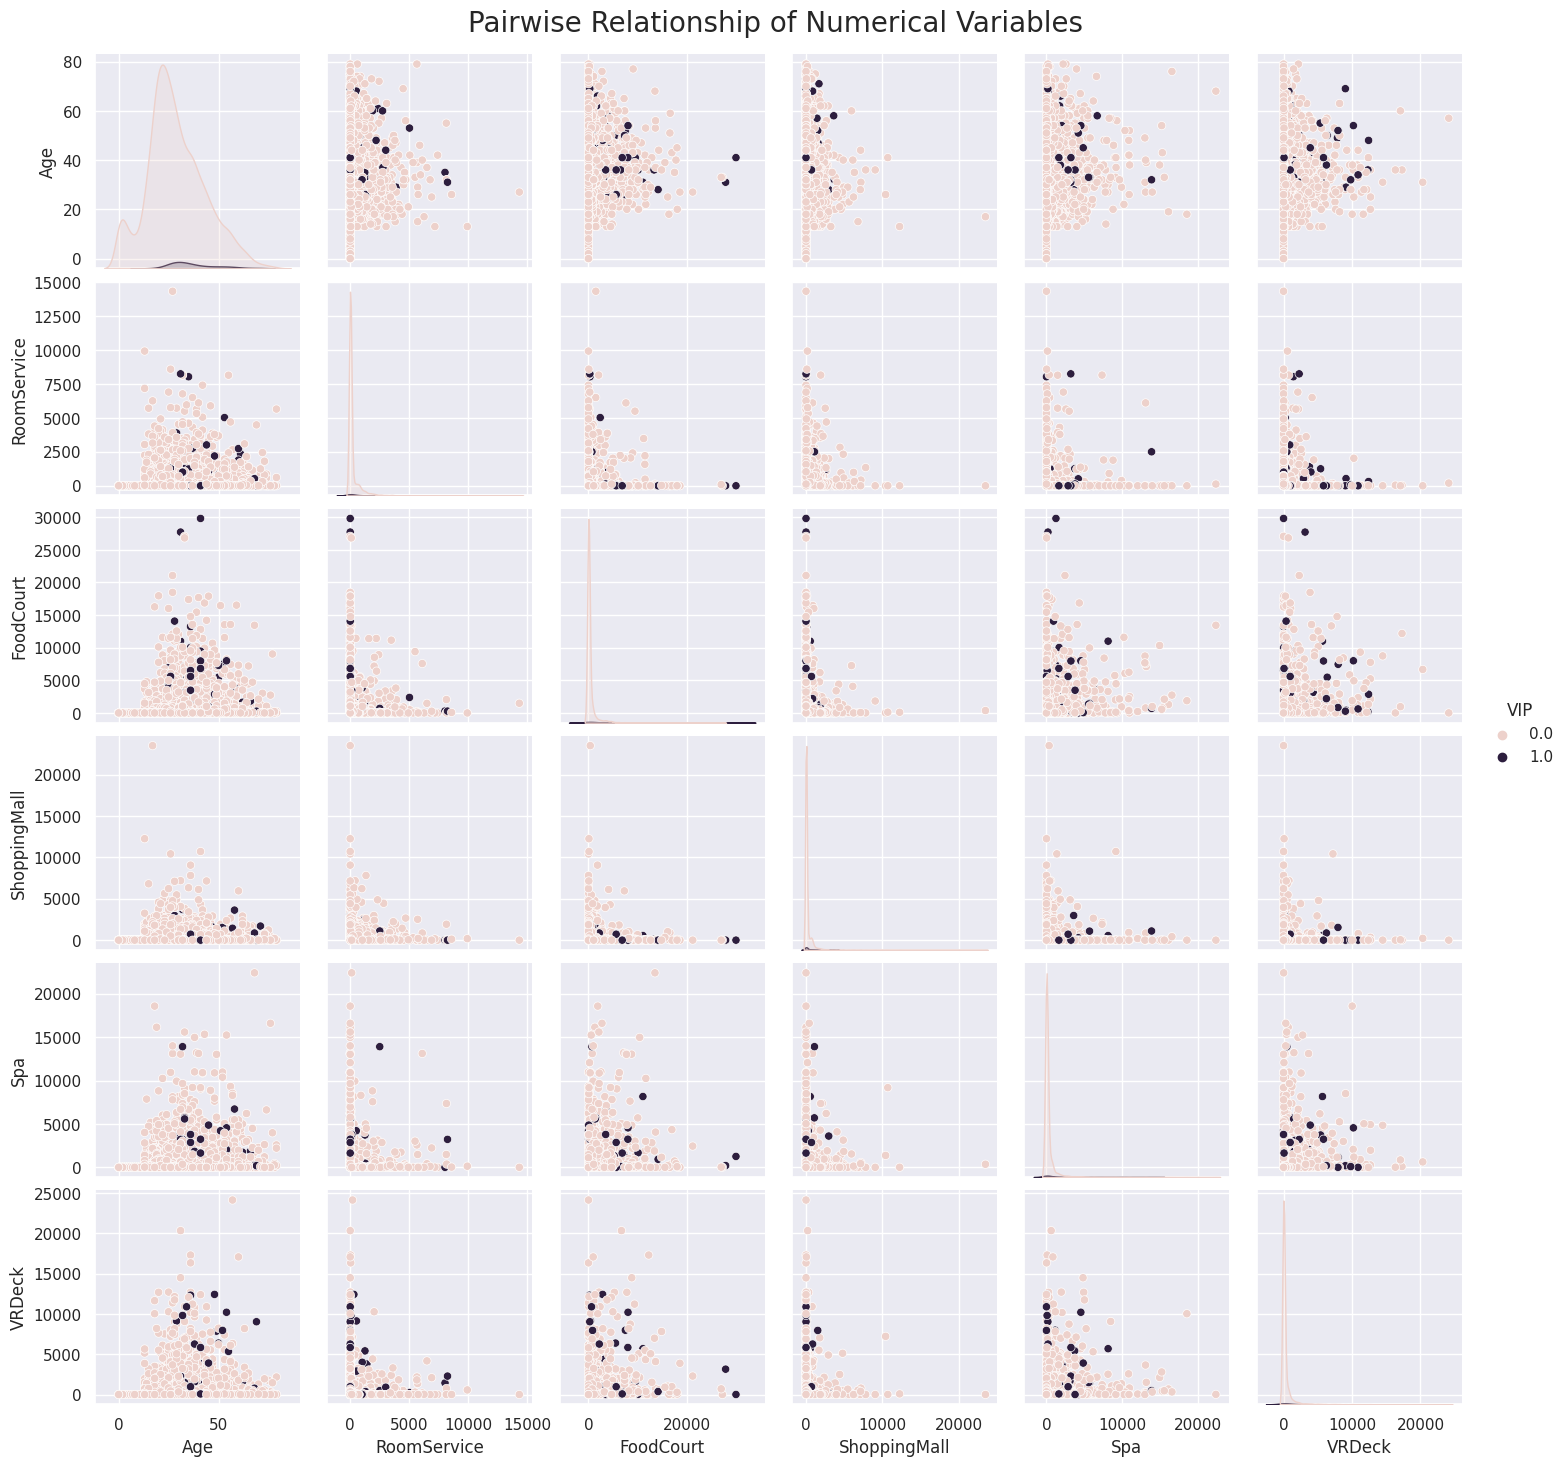

In [42]:
# Pairwise Relationship of Numerical Variables
sns.set()

cat_feat = "VIP"

# Setting pairplot
sns.pairplot(df[metric_features + [cat_feat]], diag_kind="kde", hue=cat_feat)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [43]:
metric_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [44]:
non_metric_features

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

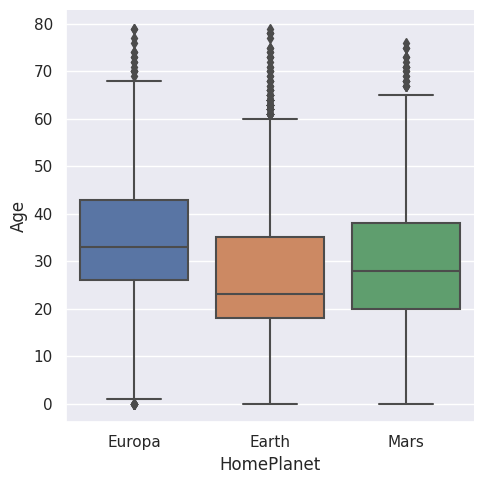

In [45]:
sns.catplot(data=df, x="HomePlanet", y="Age", kind="box")
plt.show()


## Extra: Visualization Aesthetics

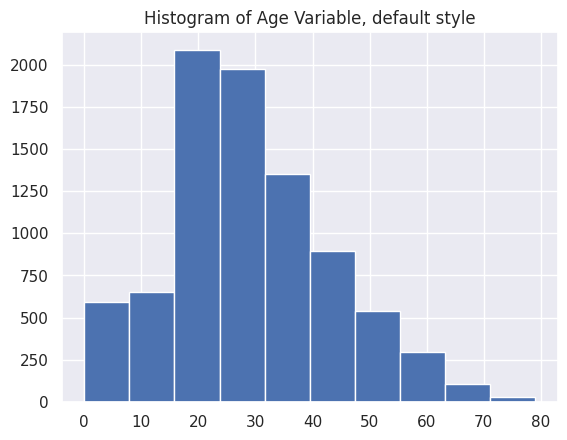

In [46]:
# Single Metric Variable Histogram
sns.set()
plt.hist(df["Age"])
plt.title("Histogram of Age Variable, default style")

plt.show()

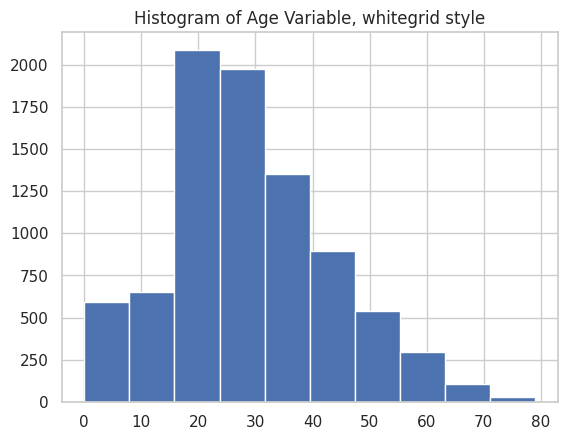

In [47]:
sns.set_style("whitegrid")
plt.hist(df["Age"])
plt.title("Histogram of Age Variable, whitegrid style")

plt.show()

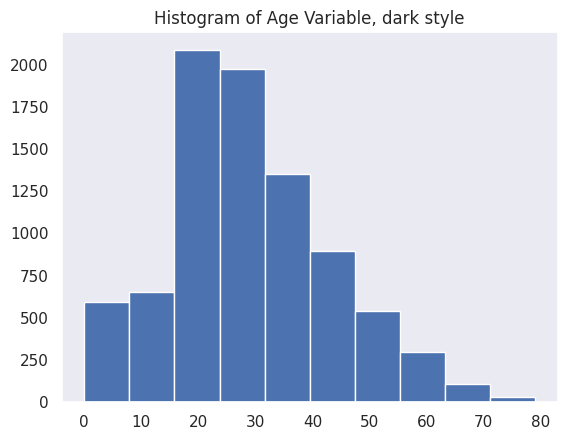

In [48]:
sns.set_style("dark")
plt.hist(df["Age"])
plt.title("Histogram of Age Variable, dark style")

plt.show()

In [49]:
## TRY:
## https://seaborn.pydata.org/tutorial/aesthetics.html

# sns.set_style("white")
# sns.set_style("ticks")


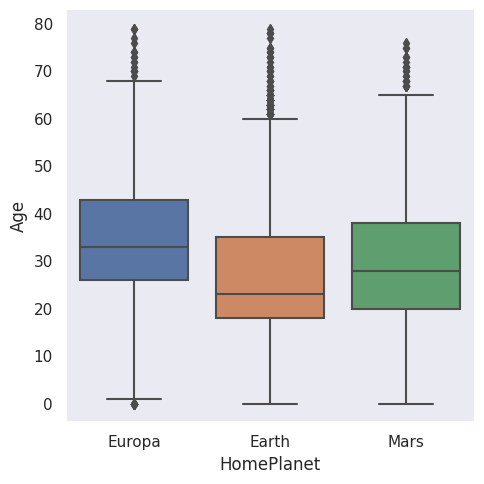

In [50]:
## What about colors?

sns.catplot(data=df, x="HomePlanet", y="Age", kind="box")
plt.show()


Preconfigured color palettes:

- from matplotlib: 
https://matplotlib.org/stable/tutorials/colors/colormaps.html

- from seaborn: https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

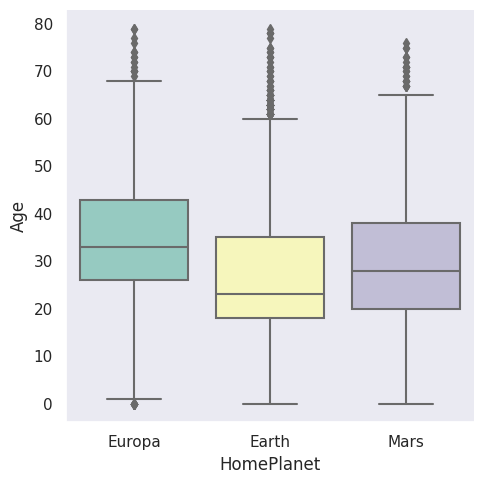

In [51]:
sns.set_palette("Set3")
sns.catplot(data=df, x="HomePlanet", y="Age", kind="box")
plt.show()


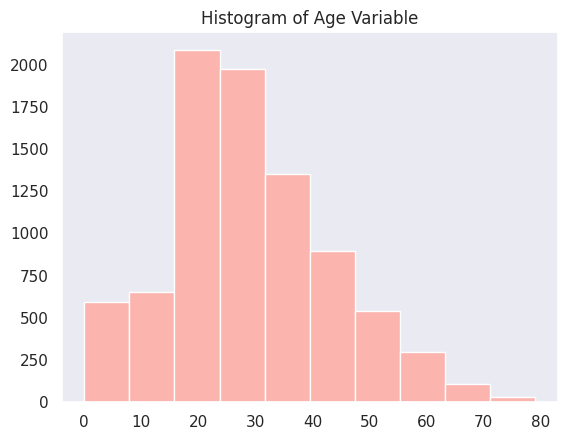

In [52]:
sns.set_palette("Pastel1")

plt.hist(df["Age"])
plt.title("Histogram of Age Variable")

plt.show()

## Insights

By exploring our data we found several issues:

* Missing values (NaN in data)
* Outliers
* High cardinality categories
* Non-numeric features

We need to address these features first before we can proceed with modeling our data.

<br>
<br>

We also need to consider:

* Feature engineering
* Feature selection

<br>
<br>

These are some of the relevant steps we can consider in the Data Preprocessing stage:

- Coherence check (find inconsistent values, missing values, outliers and any other problem you may find in your dataset)
- Data editing (fix inconsistent values)
- Data cleansing (drop observations - Outlier removal and removal of inconsistent values and/or features)
- Data wrangling (feature extraction/engineering and transformation)
- Data reduction (reducing the dimensionality of a dataset, producing summary statistics, reducing the number of records in a dataset)